In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11490434/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [ ]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 14s 7ms/step - loss: 0.3579 - accuracy: 0.8905 - val_loss: 0.0818 - val_accuracy: 0.9780
Epoch 2/15
422/422 [==============================] - 2s 5ms/step - loss: 0.1116 - accuracy: 0.9664 - val_loss: 0.0570 - val_accuracy: 0.9832
Epoch 3/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0835 - accuracy: 0.9746 - val_loss: 0.0457 - val_accuracy: 0.9873
Epoch 4/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0729 - accuracy: 0.9775 - val_loss: 0.0391 - val_accuracy: 0.9898
Epoch 5/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0618 - accuracy: 0.9818 - val_loss: 0.0388 - val_accuracy: 0.9890
Epoch 6/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0547 - accuracy: 0.9835 - val_loss: 0.0352 - val_accuracy: 0.9903
Epoch 7/15
422/422 [==============================] - 2s 6ms/step - loss: 0.0503 - accuracy: 0.9846 - val_loss: 0.0378 - val_accuracy: 0.9897
Epoch

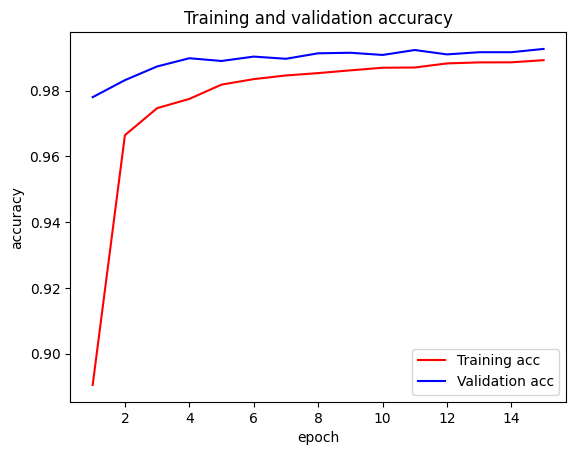

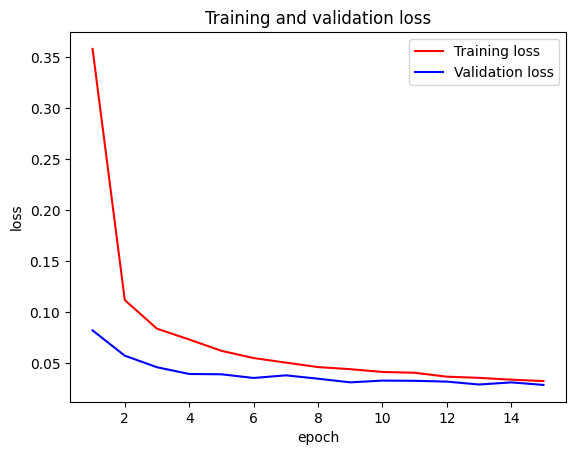

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
# plt.ylim((0,1.1))
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
# plt.ylim((0,2))
plt.show()

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.025460923090577126
Test accuracy: 0.9908999800682068


313/313 [==============================] - 1s 2ms/step
Accuracy Score : 0.9909
Confusion Matrix : 
[[ 978    0    0    0    0    0    0    1    1    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [   2    2 1022    0    1    0    0    4    1    0]
 [   0    0    2 1002    0    3    0    2    1    0]
 [   0    0    0    0  980    0    0    0    0    2]
 [   0    0    0    4    0  886    1    1    0    0]
 [   5    2    1    0    1    6  941    0    2    0]
 [   0    3    4    0    0    0    0 1019    1    1]
 [   3    0    2    2    1    1    0    3  960    2]
 [   2    1    1    0    4    6    0    5    2  988]]


<Axes: >

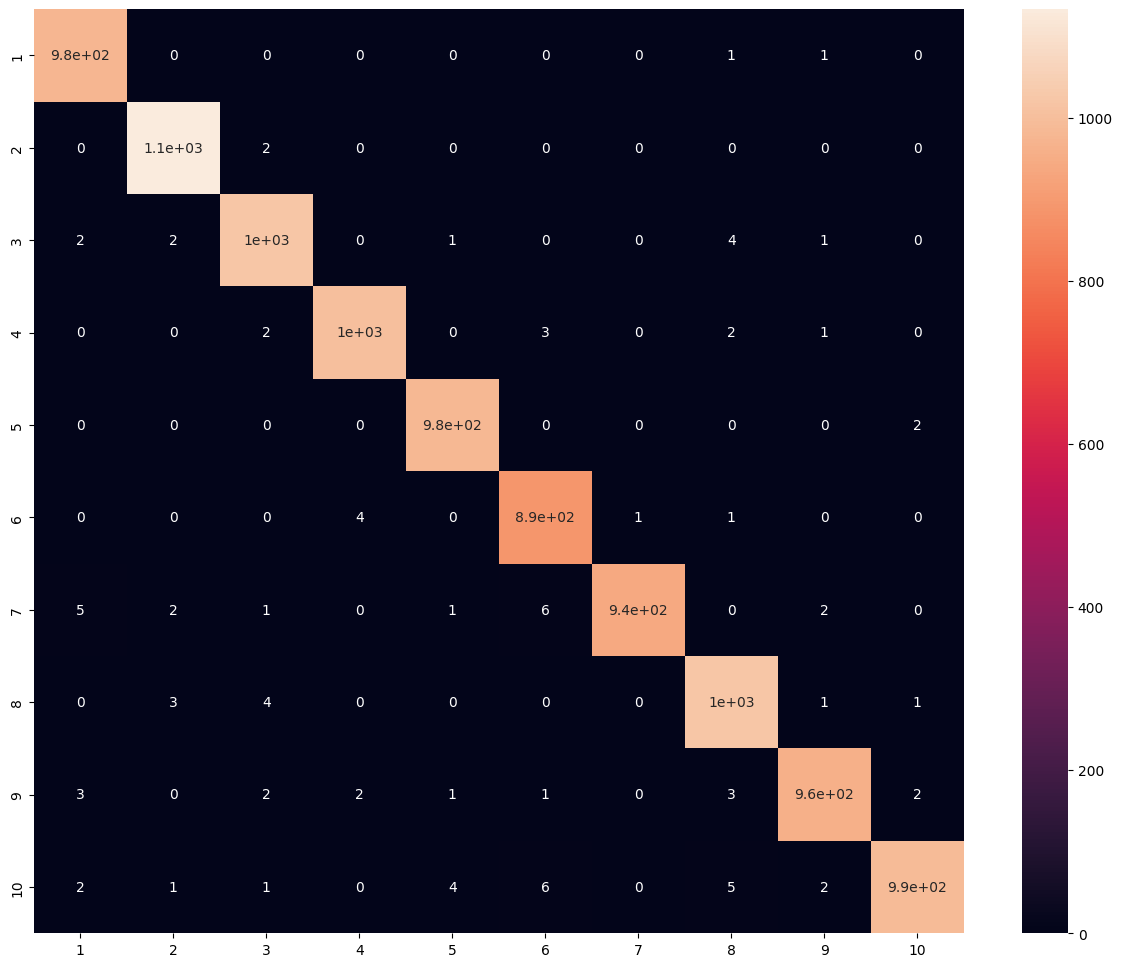

In [ ]:
import pandas as pd
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sn

prdt = model.predict(x_test)

y_pred = np.argmax(prdt, axis=1)

y_classes = np.argmax(y_test,axis=1)

con_mat=confusion_matrix(y_classes, y_pred)
print ('Accuracy Score :',accuracy_score(y_classes, y_pred) )
print ('Confusion Matrix : ')
print(con_mat)
classes = ['1','2','3','4','5','6','7','8','9','10']
cm = pd.DataFrame(con_mat, index = classes,
                  columns = classes)
plt.figure(figsize = (15,12))
sn.heatmap(cm, annot=True)
